In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Рассмотрим датасет с kaggle. Датасет представляет собой информацию о пациентах клиники.<br> Цель - научиться предсказывать наличие болезни сердца в зависимости от 11 показателей, используя алгоритмы классического ML

Описание датасета с kaggle:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [79]:
path = 'heart.csv'
dataset = pd.read_csv(path)
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [80]:
dataset.shape

(918, 12)

In [81]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Пустые значения в датасете отсутствуют:

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [83]:
dataset[dataset.isnull()==True].count()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Рассмотрим данные более подробно:

In [84]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Рассмотрим средние величины для здоровых людей и имеющих болезнь сердца

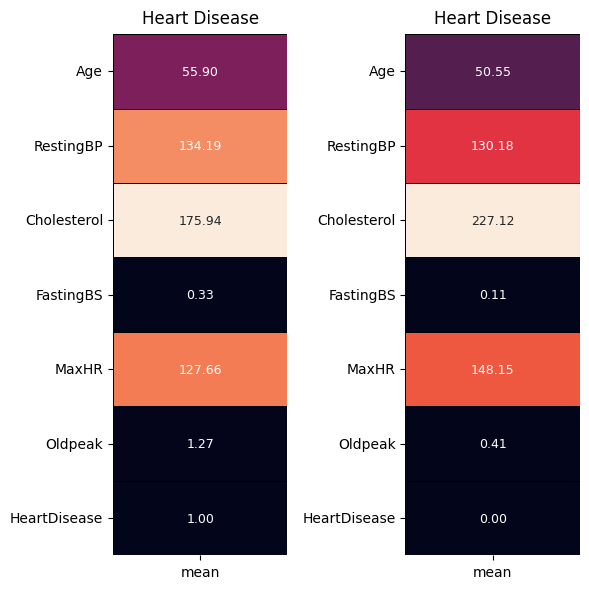

In [86]:
desease = dataset[dataset['HeartDisease'] == 1].describe().T
no_desease = dataset[dataset['HeartDisease'] == 0].describe().T

fig, axes = plt.subplots(1, 2, figsize=(6, 6))  
plt.subplots_adjust(wspace=0.35, left=0.2, right=0.95)

sns.heatmap(desease[['mean']], ax=axes[0], annot=True, fmt=".2f",linewidths=0.5, linecolor="black", cbar=False, annot_kws={"fontsize": 9})
axes[0].set_title('Heart Disease', pad=8, fontsize=12)

sns.heatmap(no_desease[['mean']], ax=axes[1], annot=True, fmt=".2f",linewidths=0.5, linecolor="black", cbar=False, annot_kws={"fontsize": 9})
axes[1].set_title('Heart Disease', pad=8, fontsize=12)

plt.tight_layout()
plt.show()

Поделим данные на категориальные признаки и числовые. Считаем числовыми признаками те, которые принимают больше 10 значений. Можно в качестве альтерантивы рассматривать числовые признаки как те, которые имеют тип данных float или integer.

In [87]:
col = list(dataset.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(dataset[i].unique()) > 10:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features', categorical_features)
print('Numerical Features', numerical_features)

Categorical Features ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


Используем LabelEncoder для удобства работы с категориальными признаками

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = dataset.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

Построим распределения категориальных признаков:

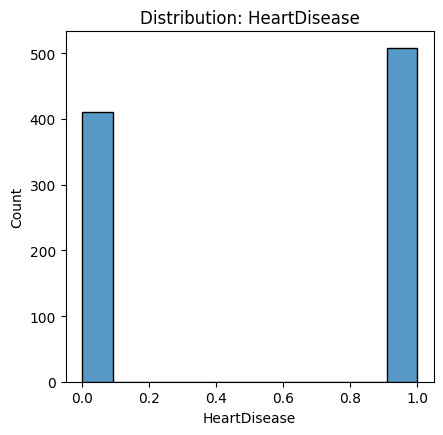

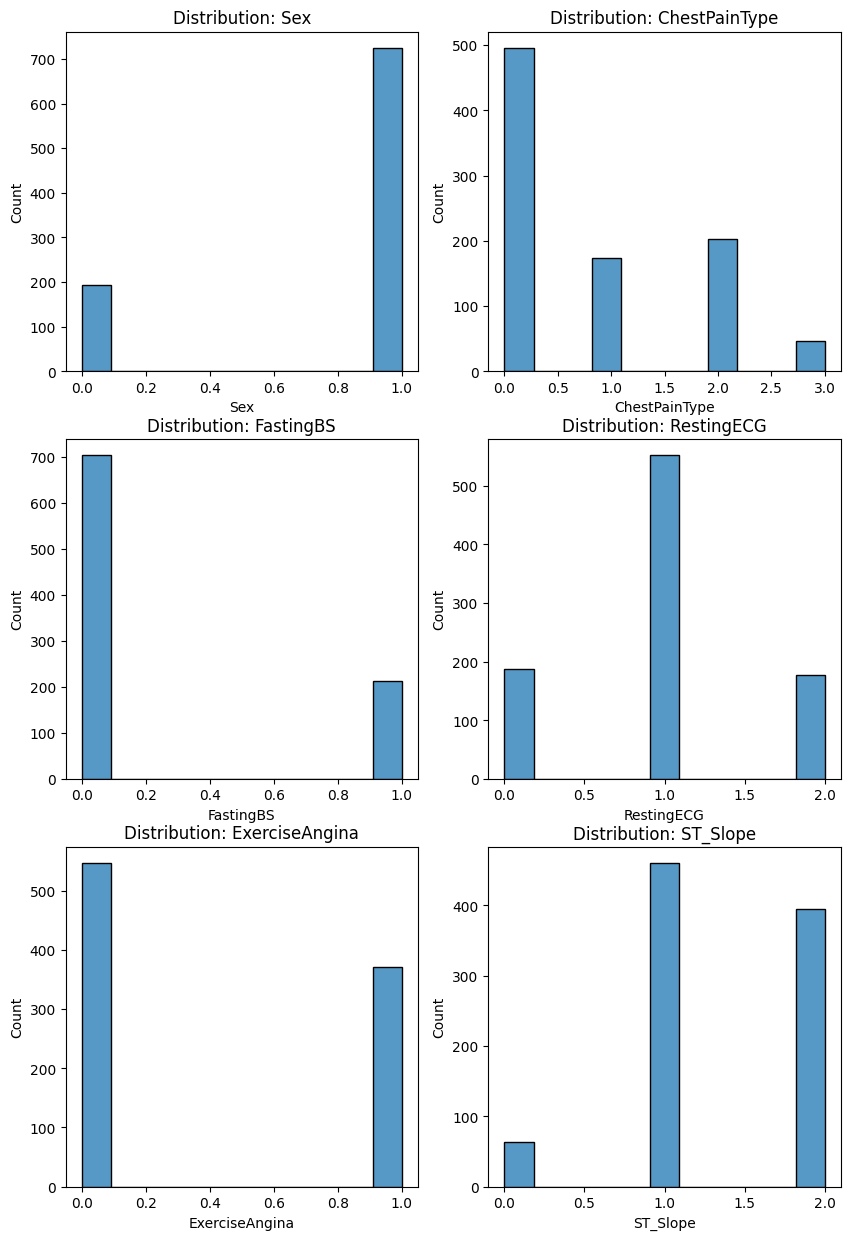

Text(0.5, 1.0, 'Distribution: HeartDisease')

In [70]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))

for i in range(len(categorical_features)-1):
    
    plt.subplot(3,2,i+1)
    sns.histplot(df1[categorical_features[i]]);
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)
plt.show()
plt.figure(figsize = (4.75,4.55))
sns.histplot(df1[categorical_features[len(categorical_features) - 1]])
title = 'Distribution: ' + categorical_features[len(categorical_features) - 1]
plt.title(title)


По первому графику HeartDisease видно, что датасет сбалансирован, то есть число объектов обоих классов (больные и здоровые) примерно одинаково

Построим распределение для числовых признаков

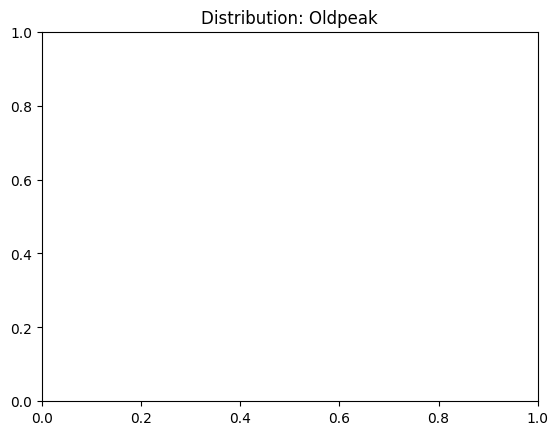

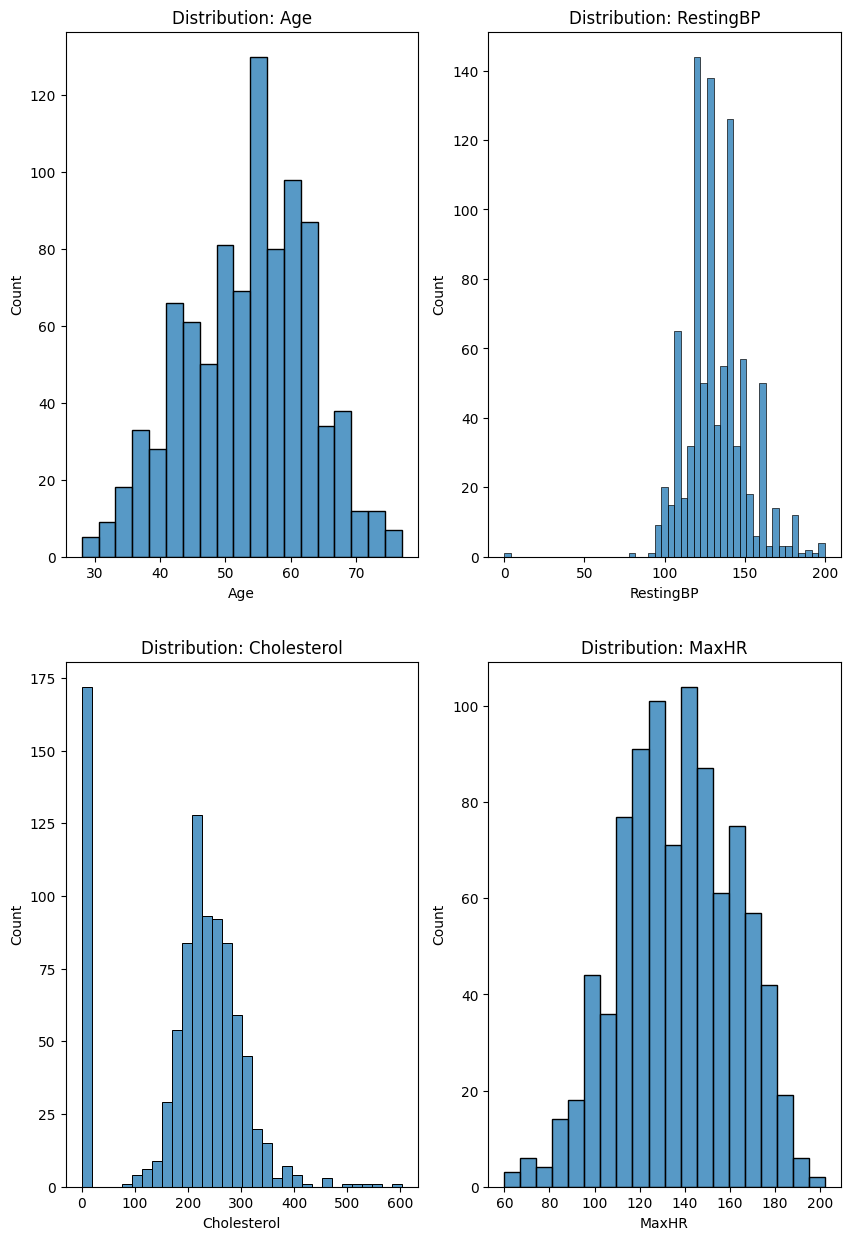

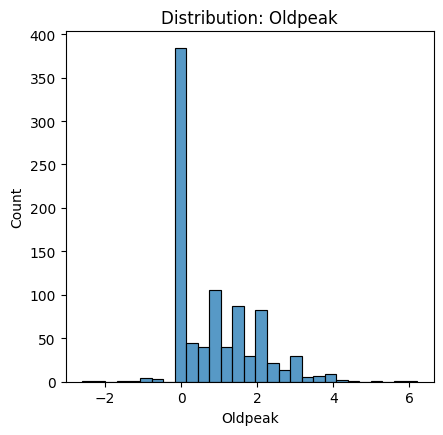

In [74]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,15))

for i in range(len(numerical_features)-1):
    
    plt.subplot(2,2,i+1)
    sns.histplot(df1[numerical_features[i]]);
    title = 'Distribution: ' + numerical_features[i]
    plt.title(title)
plt.figure(figsize = (4.75,4.55))
sns.histplot(df1[numerical_features[len(numerical_features) - 1]])
title = 'Distribution: ' + numerical_features[len(numerical_features) - 1]
plt.title(title)
plt.show()


В целом, распределения близки к нормальному, кроме Oldpeak

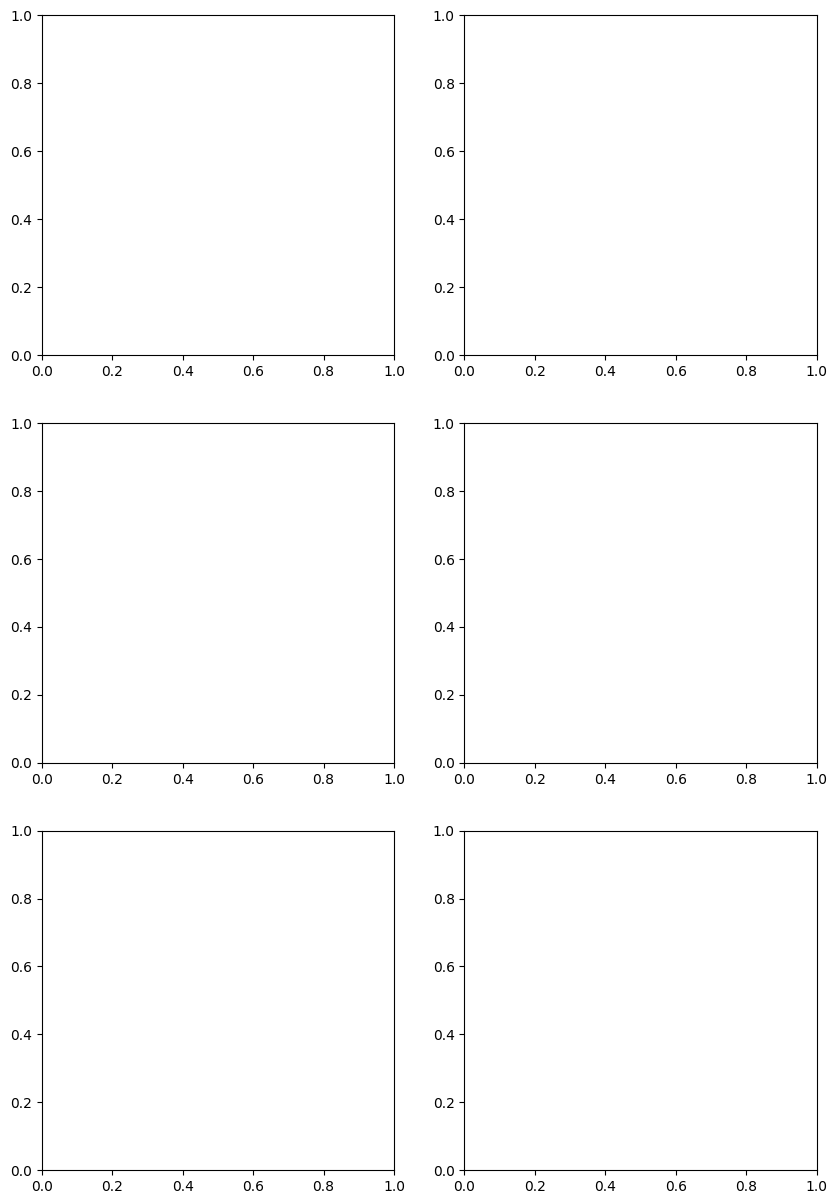

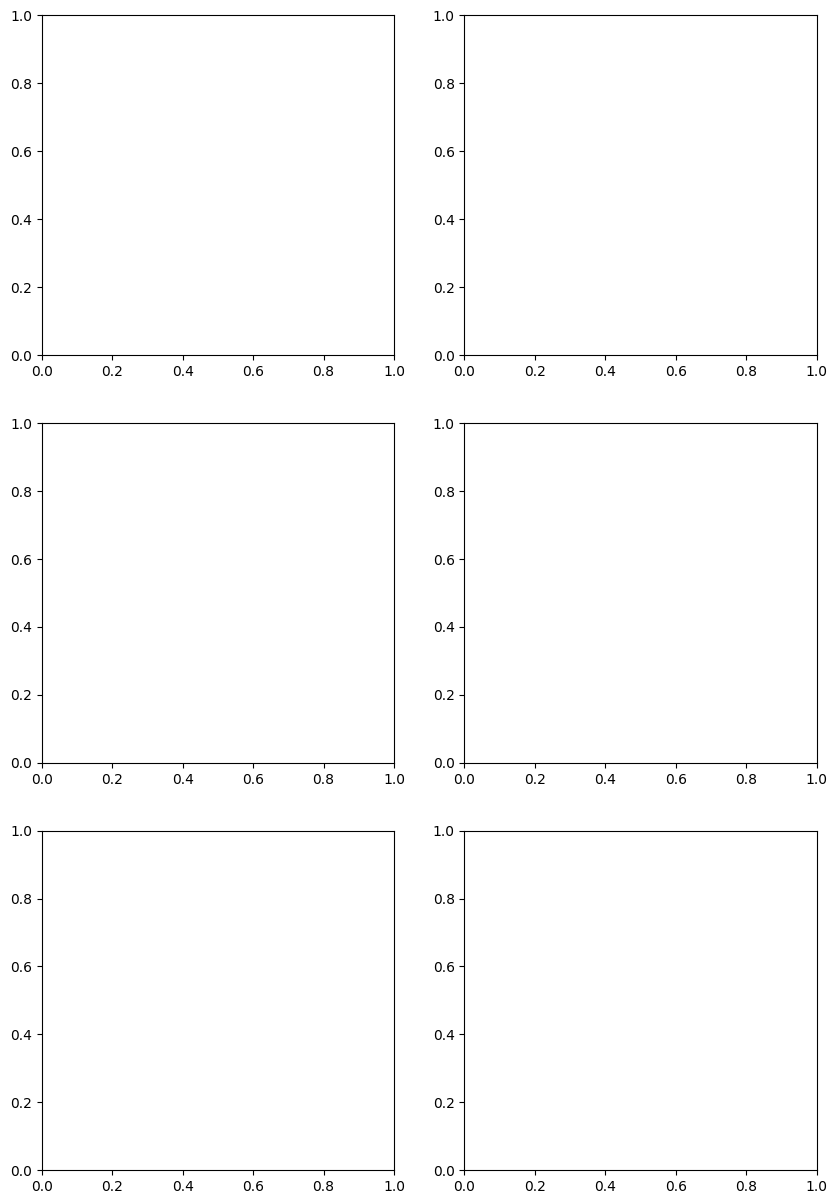

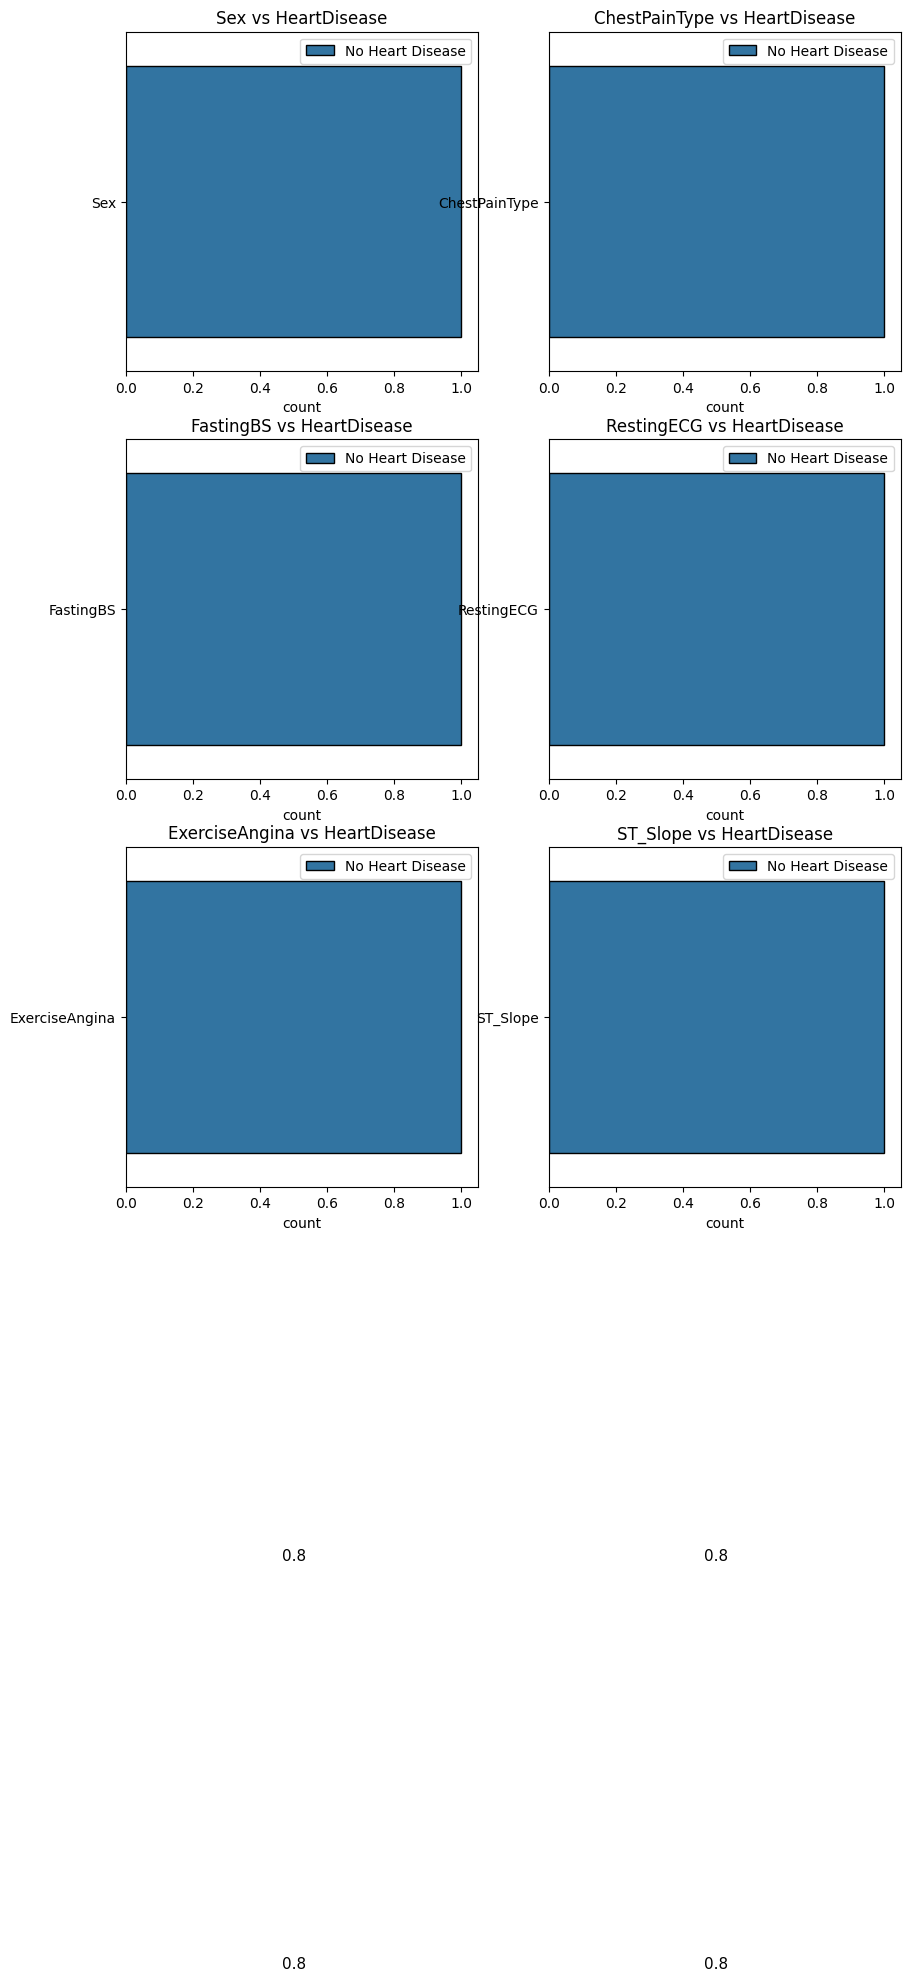

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(categorical_features[i],data = dataset,hue = "HeartDisease", edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)
plt.show()

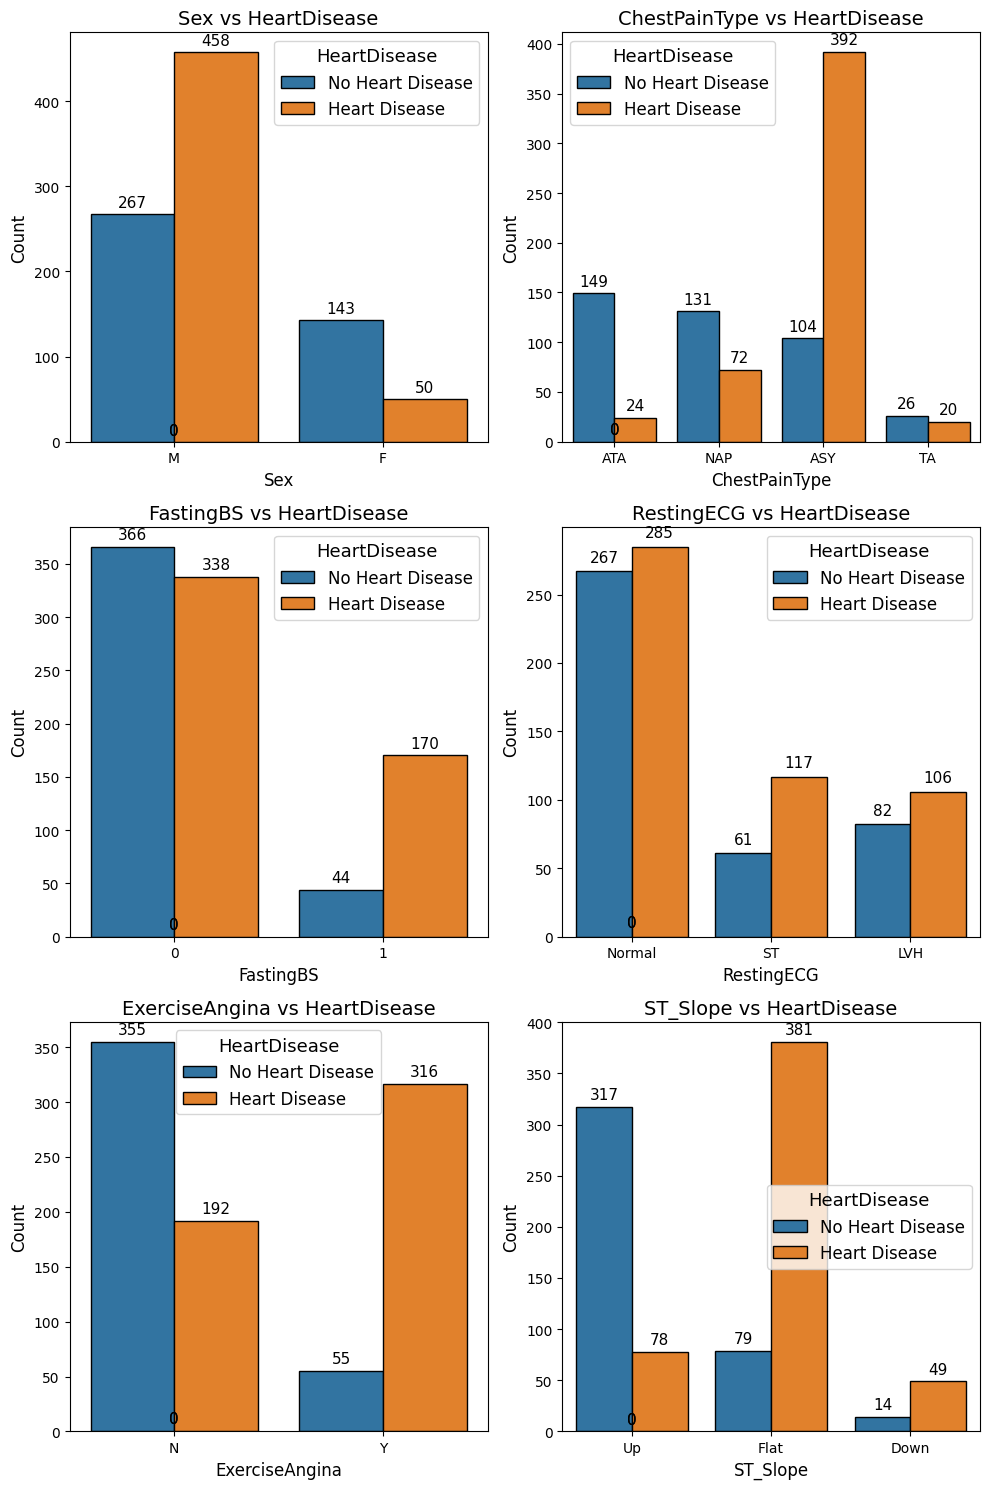

In [94]:
features = categorical_features[:-1]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.countplot(x=feature, hue="HeartDisease", data=dataset, edgecolor='black', ax=ax)
    for rect in ax.patches:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, h + max(dataset.shape[0] * 0.005, 1), int(h), ha='center', va='bottom', fontsize=11)

    ax.set_title(f"{feature} vs HeartDisease", fontsize=14)
    ax.legend(title="HeartDisease", labels=['No Heart Disease', 'Heart Disease'], fontsize=12, title_fontsize=13)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

1. По диаграммам видно, что мужчин, имеющих заболевания сердца, существенно больше, чем женщин
2. При ChestPainType ASY (боль в груди asymptomatic) доля больных повышается
3. При FastingBS (Fasting Blood Sugar - уровень сахара) равном 1 (FastingBS > 120 mg/dl, то есть выше нормы) доля больных больше
4. RestingECG слабо влияет на наличие заболевания
5. ExerciseAngina Yes - наличие ангины повышает долю больных
6. ST_slope Flat и Down также повышает долю больных

Рассмотрим числовые признаки

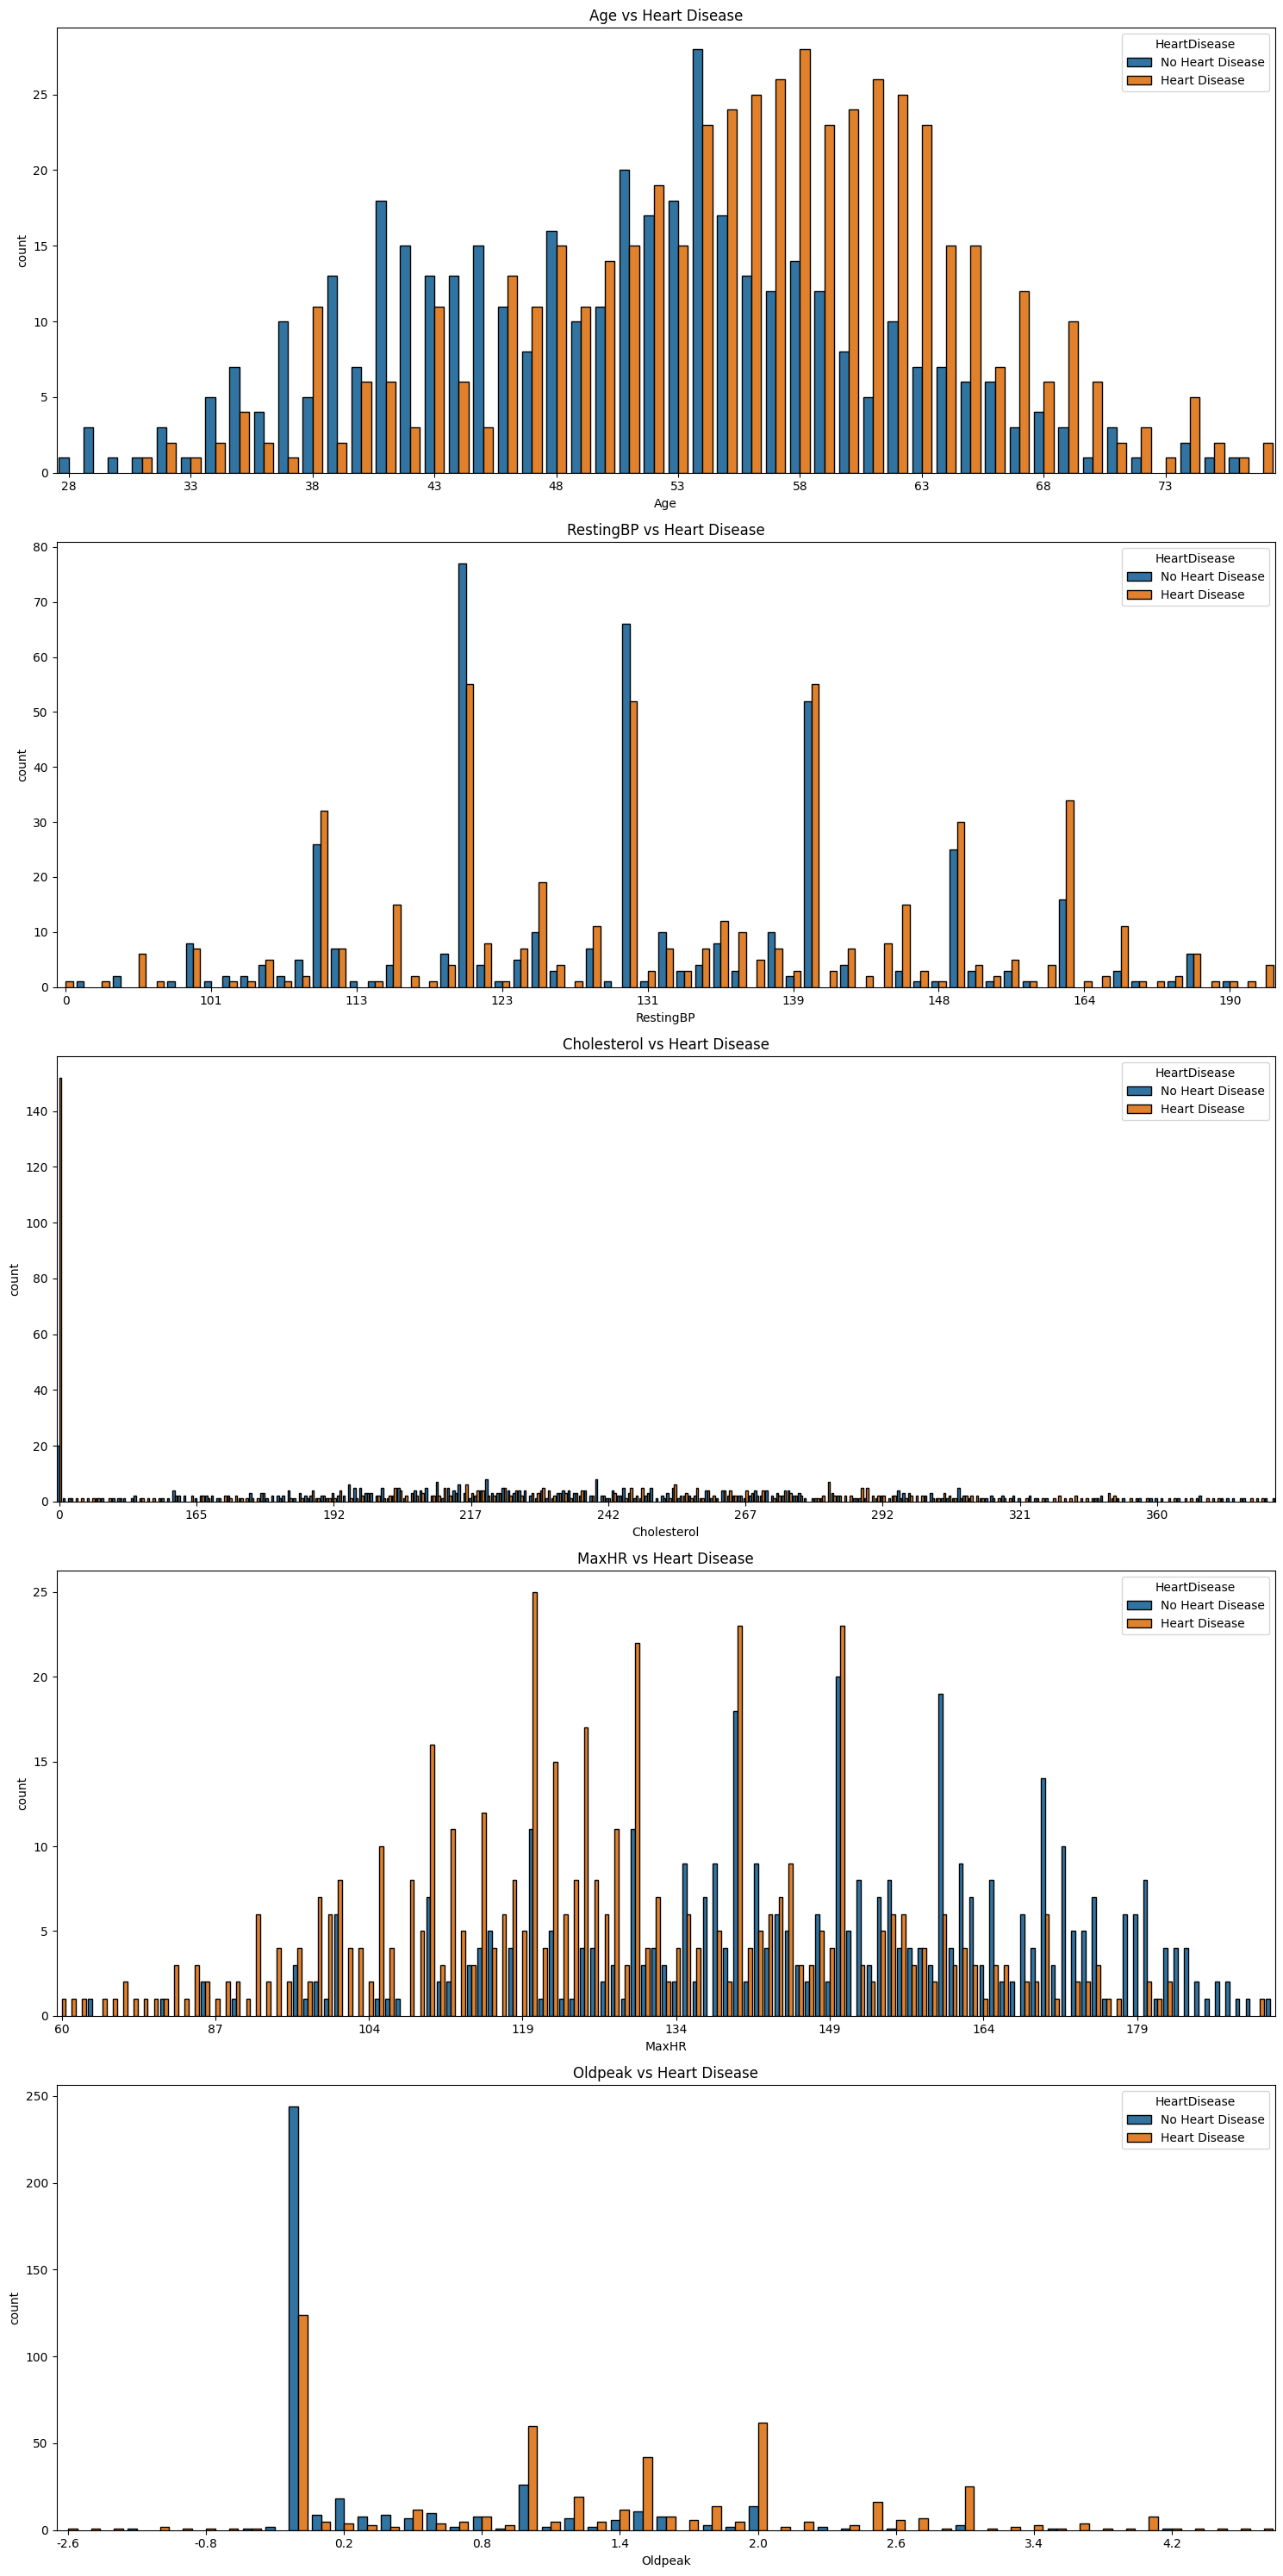

In [99]:
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))
for ax, feature in zip(axes, numerical_features):
    sns.countplot(x=feature, data=dataset, hue="HeartDisease", edgecolor="black", ax=ax)
    ax.set_title(f"{feature} vs Heart Disease")
    ax.legend(title="HeartDisease", labels=["No Heart Disease", "Heart Disease"])
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.tight_layout()
plt.show()

Вновь можно выделить группы риска<br>
1. Age более 50 высокая доля больных
2. RestingBP от 95 до 170 высокая доля больных
3. Cholesterol от 160 до 340 высокая доля больных
4. MaxHR от 70 до 180 высокая доля больных
5. Oldpeak от 0 до 4 высокая доля больных

Проведем скейлинг данных, так как разные признаки принимают, как большие значения (например, Cholesterol), так и малые (например, Oldpeak)

Oldpeak распределен не нормально, поэтому тспользуем MinMaxScaler

In [100]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.295455,2,0


Рассмотрим связь признаков друг с другом

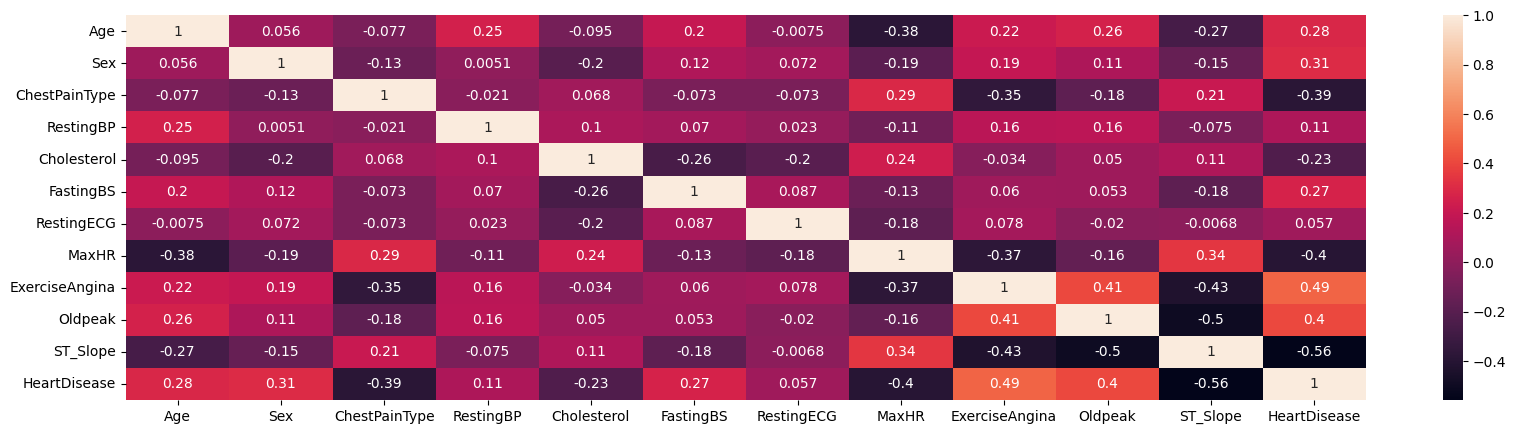

In [101]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),annot = True)
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [104]:
features = df1[df1.columns.drop(['HeartDisease'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [134]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    display = RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,fmt ='')

    print(classification_report(y_test,classifier.predict(x_test)))
    plt.show()

Для начала используем логистическую регрессию

In [127]:
from sklearn.linear_model import LogisticRegression

Accuracy :  84.24%
Cross Validation Score :  91.08%
ROC_AUC Score :  84.13%


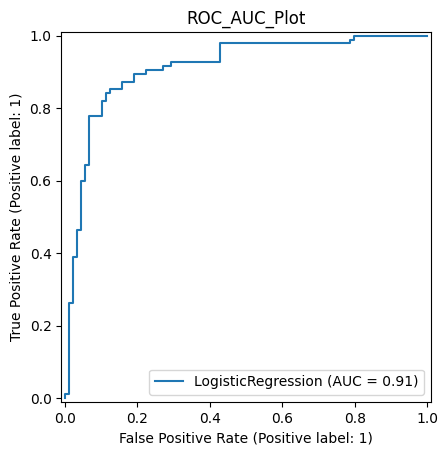

In [128]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        89
           1       0.83      0.87      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



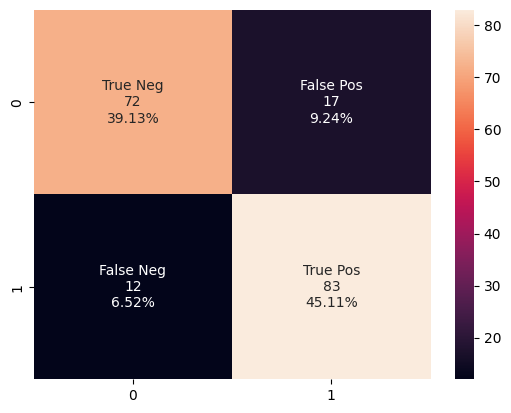

In [135]:
model_evaluation(classifier_lr)

Рассмотрим метод опорных векторов (SVC)

In [136]:
from sklearn.svm import SVC

In [137]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  85.87%
Cross Validation Score :  90.72%
ROC_AUC Score :  85.75%


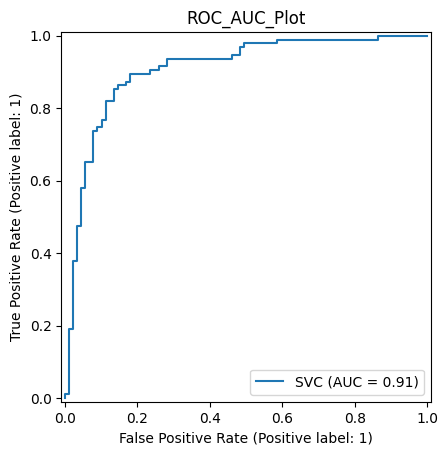

In [138]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        89
           1       0.84      0.89      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



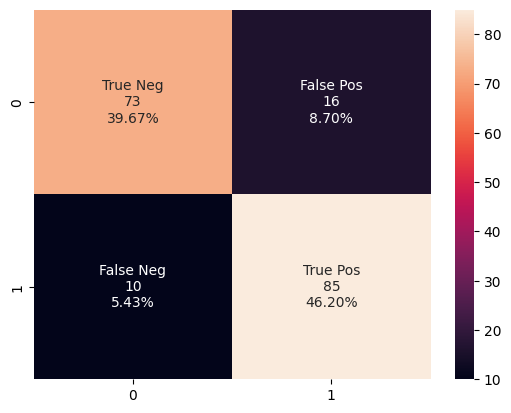

In [139]:
model_evaluation(classifier_svc)

Рассмотрим дерево решений

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
classifier_dt = DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)

Accuracy :  82.61%
Cross Validation Score :  87.80%
ROC_AUC Score :  82.38%


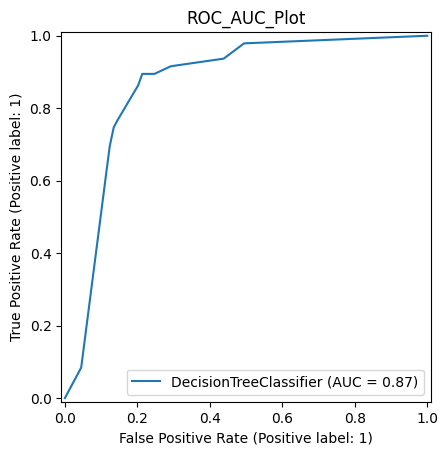

In [149]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        89
           1       0.79      0.89      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184



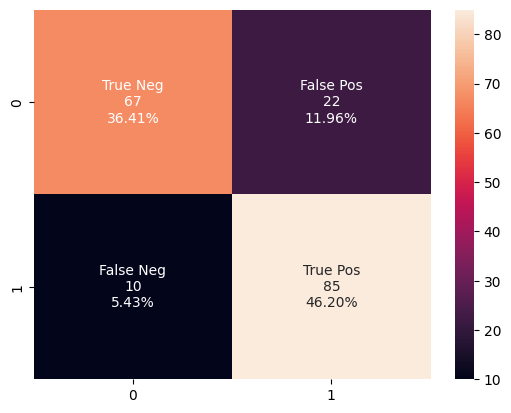

In [150]:
model_evaluation(classifier_dt)

Рассмотрим случайный лес

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  84.24%
Cross Validation Score :  93.04%
ROC_AUC Score :  84.13%


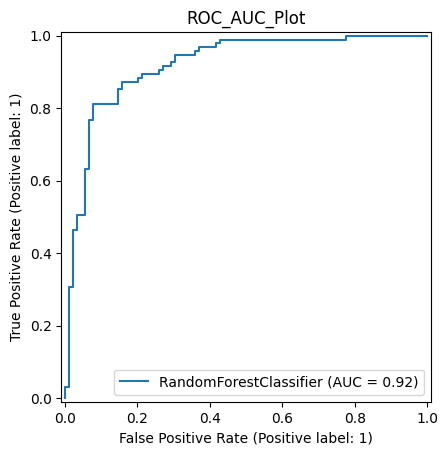

In [154]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        89
           1       0.83      0.87      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



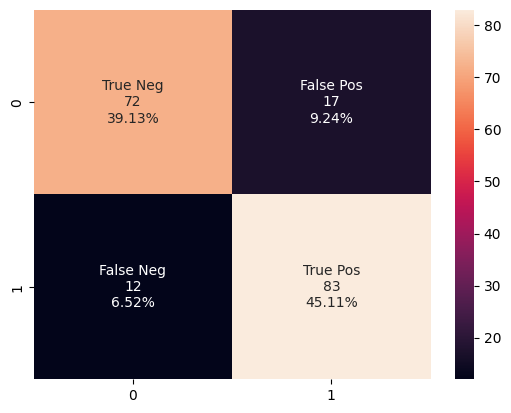

In [155]:
model_evaluation(classifier_rf)

Рассмотрим метод k ближайших соседей

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  83.70%
Cross Validation Score :  89.58%
ROC_AUC Score :  83.61%


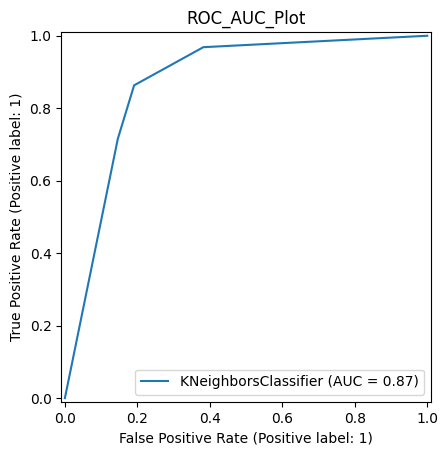

In [159]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        89
           1       0.83      0.86      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



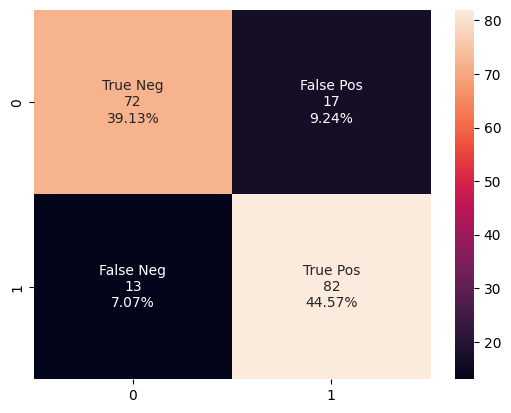

In [160]:
model_evaluation(classifier_knn)

# Итоги

Был рассмотрен датасет, собранный на основе анализов пациентов клиники. Цель была научиться предсказывать болезнь сердца в зависимости от различных покаазтелей.


Были проанализированы данные, были выделены числовые и категориальные признаки. Для работы с категориальными признаками использовался LabelEncodind

Были рассмотрены различные модели:
1. Логистическая регрессия
2. Метод опорных векторов (SVC)
3. Дерево решений
4. Случайный лес
5. Метод k ближайших соседей (k=3)

Лучше всего показали себя логистическая регрессия, метод опорных векторов и случайный лес